# TELECOMMUNICATION

**Content** 

* Data Preprocess
* Simple Data Analysis
* Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocess

In [2]:
df = pd.read_csv('/kaggle/input/telecom-users-dataset/telecom_users.csv')
print(df.shape)
df.head()

(5986, 22)


,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


* Data has no null variables so that is great.
* We do not need some of these columns in both data analysis and prediction approaches.
* Also 'Yes' and 'No' is not ideal to have a classification model so I will change them to 1 = 'Yes' and 0 = 'No'.

In [4]:
df = df.drop(['Unnamed: 0', 'customerID'], axis=1)
df = df.replace('No', 0)
df = df.replace('Yes', 1)
df = df.replace('No internet service', 0)

In [5]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,1,1,72,1,1,0,0,0,0,0,0,0,Two year,0,Credit card (automatic),24.10,1734.65,0
1,Female,0,0,0,44,1,0,Fiber optic,0,1,1,0,1,0,Month-to-month,1,Credit card (automatic),88.15,3973.2,0
2,Female,1,1,0,38,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Bank transfer (automatic),74.95,2869.85,1
3,Male,0,0,0,4,1,0,DSL,0,0,0,0,0,1,Month-to-month,1,Electronic check,55.90,238.5,0
4,Male,0,0,0,2,1,0,DSL,1,0,1,0,0,0,Month-to-month,0,Electronic check,53.45,119.5,0


In [6]:
df['InternetService'].value_counts()

Fiber optic    2627
DSL            2068
0              1291
Name: InternetService, dtype: int64

In [7]:
df['InternetService'] = df['InternetService'].replace('Fiber optic', 2)
df['InternetService'] = df['InternetService'].replace('DSL', 1)

**Internet service:**
* Fiber optic = 2
* DSL = 1

In [8]:
df['Contract'].value_counts()

Month-to-month    3269
Two year          1441
One year          1276
Name: Contract, dtype: int64

In [9]:
df['Contract'] = df['Contract'].replace('Two year', 24)
df['Contract'] = df['Contract'].replace('One year', 12)
df['Contract'] = df['Contract'].replace('Month-to-month', 1)

**Contract:**
* 'Month-to-month' = 1
* 'Two Year' = 24
* 'One Year' = 12

In [10]:
df['PaymentMethod'].value_counts()

Electronic check             2006
Mailed check                 1369
Bank transfer (automatic)    1308
Credit card (automatic)      1303
Name: PaymentMethod, dtype: int64

In [11]:
df['PaymentMethod'] = df['PaymentMethod'].replace('Electronic check', 1)
df['PaymentMethod'] = df['PaymentMethod'].replace('Mailed check', 2)
df['PaymentMethod'] = df['PaymentMethod'].replace('Bank transfer (automatic)', 3)
df['PaymentMethod'] = df['PaymentMethod'].replace('Credit card (automatic)', 4)

df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 0)

**Payment Method:**
* 'Electronic Check' = 1
* 'Mailed Check' = 2
* 'Bank Transfer' = 3
* 'Credit Card' = 4

In [12]:
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)

Also as you can see on the above, we can change the *contract*, *internet service* and *payment method* types as well without changing column purpose. I labeled them accordingly so I will be showing these labels when we are visualizing the data.

And finally, I do think that montly and total charge values can be integers. They are determinant factors but their fraction values are not that important.

In [13]:
df['MultipleLines'] = df['MultipleLines'].astype(int)
df['MonthlyCharges'] = df['MonthlyCharges'].astype(int)
df['TotalCharges'] = df['TotalCharges'].astype(str)

In [14]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0)
df['TotalCharges'] = df['TotalCharges'].astype(float)
total_charge = df['TotalCharges']

In [15]:
for i in range(0, len(df)-1):
    total_charge[i] = int(total_charge[i])
df['TotalCharges'] = df['TotalCharges'].astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,1,0,0,0,0,0,0,0,24,0,4,24,1734,0
1,0,0,0,0,44,1,0,2,0,1,1,0,1,0,1,1,4,88,3973,0
2,0,1,1,0,38,1,1,2,0,0,0,0,0,0,1,1,3,74,2869,1
3,1,0,0,0,4,1,0,1,0,0,0,0,0,1,1,1,1,55,238,0
4,1,0,0,0,2,1,0,1,1,0,1,0,0,0,1,0,1,53,119,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            5986 non-null   int64
 1   SeniorCitizen     5986 non-null   int64
 2   Partner           5986 non-null   int64
 3   Dependents        5986 non-null   int64
 4   tenure            5986 non-null   int64
 5   PhoneService      5986 non-null   int64
 6   MultipleLines     5986 non-null   int64
 7   InternetService   5986 non-null   int64
 8   OnlineSecurity    5986 non-null   int64
 9   OnlineBackup      5986 non-null   int64
 10  DeviceProtection  5986 non-null   int64
 11  TechSupport       5986 non-null   int64
 12  StreamingTV       5986 non-null   int64
 13  StreamingMovies   5986 non-null   int64
 14  Contract          5986 non-null   int64
 15  PaperlessBilling  5986 non-null   int64
 16  PaymentMethod     5986 non-null   int64
 17  MonthlyCharges    5986 non-null  

Now the data is ready. Every column is in integer form.
I will be looking for correlations of the columns with the *Churn* and if I find any uncorrelated columns I will drop them.

# Simple Data Analysis

<AxesSubplot:xlabel='Partner', ylabel='MonthlyCharges'>

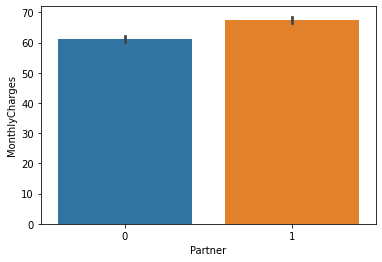

In [18]:
sns.barplot(x='Partner', y='MonthlyCharges', data=df)

Text(0, 0.5, 'Charge')

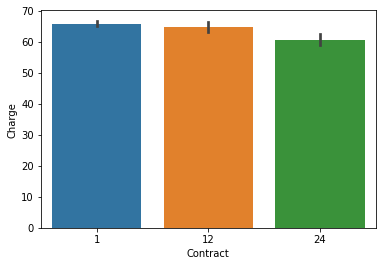

In [19]:
sns.barplot(x='Contract', y='MonthlyCharges', data=df)
plt.ylabel('Charge')

Text(0.5, 0, 'Non senior - Senior')

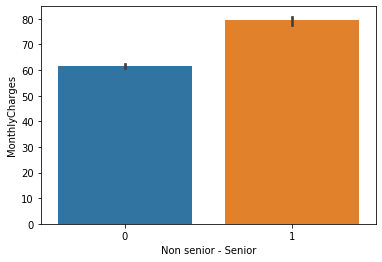

In [20]:
sns.barplot(x='SeniorCitizen', y='MonthlyCharges', data=df)
plt.xlabel('Non senior - Senior')

Text(0.5, 0, 'No Internet - DSL - Fiber optic')

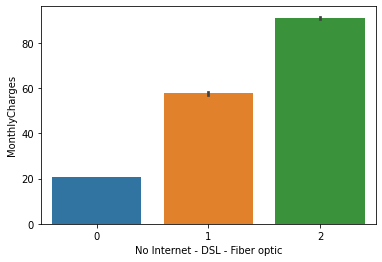

In [21]:
sns.barplot(x='InternetService', y='MonthlyCharges', data=df)
plt.xlabel('No Internet - DSL - Fiber optic')

* Having a partner or not having a partner does not effect the monthly charges that much, the effect is very minimal.
* Contract year effects monthly costs. The contract with the most length has the lowest prices because of the commitment of the customer.
* Senior citizens pays more than non senior citizens. That might be because younger people use more internet so their contracts have more throughput.
* Fiber optic is the fastest and most reliable internet right now. It is not surprise that it is the most expensive one.

# Prediction

In [22]:
corr = df.corr()

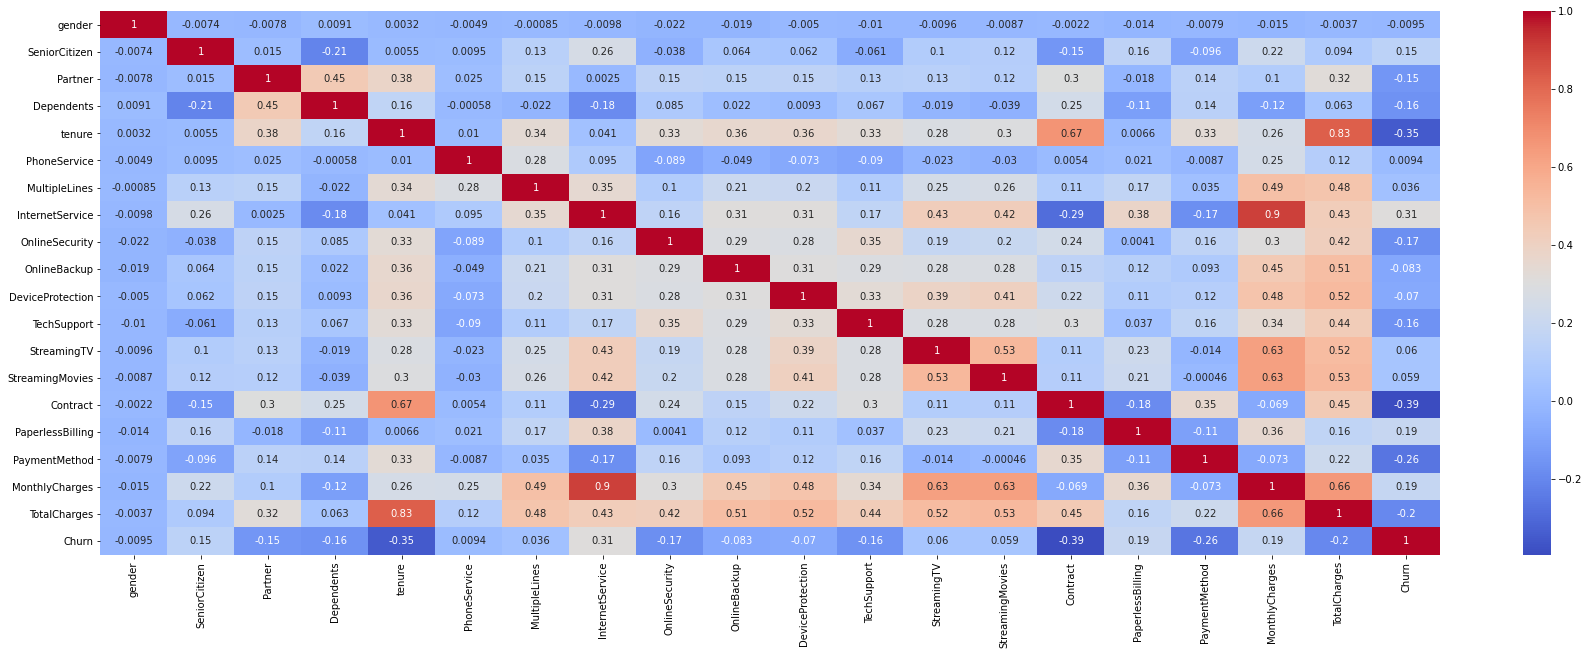

In [23]:
plt.figure(figsize=(30,10))
sns.heatmap(corr, cmap='coolwarm', annot = True)
plt.show()

I will not be looking each column one by one. I will choose the most correlated ones and use them in my models.

In [24]:
corr[abs(corr['Churn']) > 0.1].index

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'InternetService',
       'OnlineSecurity', 'TechSupport', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [25]:
df = df[['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'InternetService',
       'OnlineSecurity', 'TechSupport', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']]

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

In [27]:
x = df.drop(['Churn'], axis=1)
y = df['Churn']

In [28]:
x.shape, y.shape

((5986, 12), (5986,))

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**LOGISTIC REGRESSION**

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       895
           1       0.62      0.50      0.56       303

    accuracy                           0.80      1198
   macro avg       0.73      0.70      0.71      1198
weighted avg       0.79      0.80      0.79      1198



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


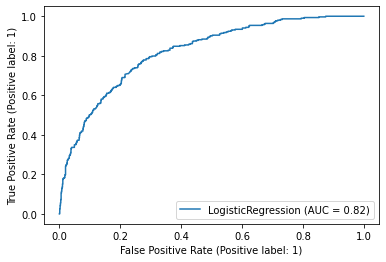

In [30]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(x_train, y_train)
prediction_lr = logistic.predict(x_test)
print(classification_report(y_test,prediction_lr))
metrics.plot_roc_curve(logistic, x_test, y_test)

**DECISION TREE**

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       895
           1       0.47      0.51      0.49       303

    accuracy                           0.73      1198
   macro avg       0.65      0.66      0.65      1198
weighted avg       0.74      0.73      0.74      1198



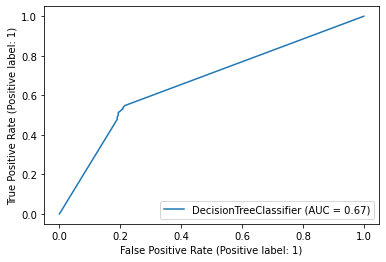

In [31]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
prediction_dt = tree.predict(x_test)
print(classification_report(y_test, prediction_dt))
metrics.plot_roc_curve(tree, x_test, y_test)

**RANDOM FOREST**

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       895
           1       0.58      0.46      0.51       303

    accuracy                           0.78      1198
   macro avg       0.71      0.67      0.69      1198
weighted avg       0.77      0.78      0.77      1198



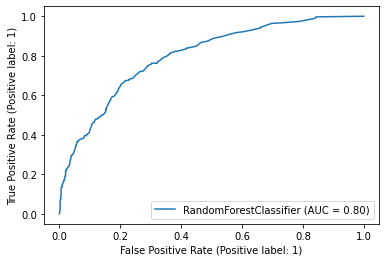

In [32]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
prediction_rf = forest.predict(x_test)
print(classification_report(y_test, prediction_rf))
metrics.plot_roc_curve(forest, x_test, y_test) 

**ARTIFICIAL NEURAL NETWORK**

In [33]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout

In [34]:
x.shape

(5986, 12)

In [35]:
model = Sequential([
    Dense(32, activation='relu', input_dim=12),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                416       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [36]:
history = model.fit(x_train, y_train, batch_size=10, epochs=200,verbose=2)

Epoch 1/200
479/479 - 1s - loss: 0.3746 - accuracy: 0.6178
Epoch 2/200
479/479 - 0s - loss: 0.2713 - accuracy: 0.7258
Epoch 3/200
479/479 - 0s - loss: 0.2660 - accuracy: 0.7314
Epoch 4/200
479/479 - 0s - loss: 0.2618 - accuracy: 0.7325
Epoch 5/200
479/479 - 0s - loss: 0.2516 - accuracy: 0.7442
Epoch 6/200
479/479 - 0s - loss: 0.2486 - accuracy: 0.7452
Epoch 7/200
479/479 - 0s - loss: 0.2503 - accuracy: 0.7429
Epoch 8/200
479/479 - 0s - loss: 0.2459 - accuracy: 0.7475
Epoch 9/200
479/479 - 0s - loss: 0.2424 - accuracy: 0.7513
Epoch 10/200
479/479 - 0s - loss: 0.2447 - accuracy: 0.7473
Epoch 11/200
479/479 - 0s - loss: 0.2421 - accuracy: 0.7513
Epoch 12/200
479/479 - 0s - loss: 0.2458 - accuracy: 0.7448
Epoch 13/200
479/479 - 0s - loss: 0.2467 - accuracy: 0.7439
Epoch 14/200
479/479 - 0s - loss: 0.2356 - accuracy: 0.7544
Epoch 15/200
479/479 - 0s - loss: 0.2345 - accuracy: 0.7496
Epoch 16/200
479/479 - 0s - loss: 0.2308 - accuracy: 0.7546
Epoch 17/200
479/479 - 0s - loss: 0.2322 - accura

In [37]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


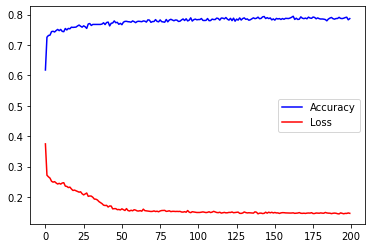

In [38]:
plt.plot(history.history['accuracy'], label='Accuracy', color='blue')
plt.plot(history.history['loss'], label='Loss', color='red')
plt.legend()

In [39]:
prediction_nn = model.predict(x_test)
prediction_nn = [1 if y>=0.5 else 0 for y in prediction_nn]
print(classification_report(y_test, prediction_nn))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       895
           1       0.69      0.40      0.51       303

    accuracy                           0.80      1198
   macro avg       0.75      0.67      0.69      1198
weighted avg       0.79      0.80      0.78      1198



We achieved around 80% accuracy with different models. If we do some feature engineering after the preprocess maybe we can increase the accuracy little bit more.